<a href="https://www.kaggle.com/hamedetezadi/survived-or-deceased?scriptVersionId=88415693" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<font size="+3.7" color="blue"><b><center>🚢 Survived or Deceased?</center></b></font><br>

<font size="+2" color="lightblue"><b><center>Final Update: 7/14/2020</center></b></font><br>

<hr>

<img src='https://i.pinimg.com/originals/c6/f4/c2/c6f4c2c3e2d8c69a444fa3d9cb41a87b.jpg' style='height: 400px'>
<hr>

<font size="+3" color="blue"><b>1 - Import Libraries</b></font><br><a id="1"></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
from statistics import mode
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

<font size="+3" color="blue"><b>2 - Read Data </b></font><br><a id="2"></a>

In this section we read in the data and check the data we are working with. As we check the data we can clearly see the data's dimensions and it's features.

In [2]:
# Reading data
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

# Storing Passenger Id for submission
Id = test.PassengerId

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.shape

(891, 12)

In [6]:
test.shape

(418, 11)

In [7]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<font size="+3" color="blue"><b>3 - Data Visualization</b></font><br><a id="3"></a>

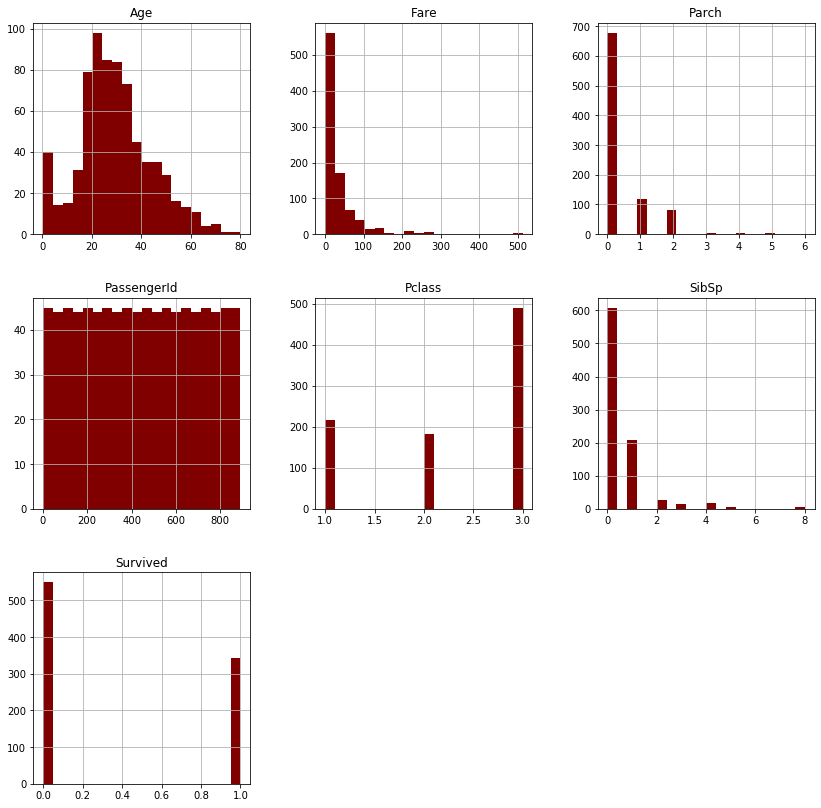

In [8]:
train.hist(figsize=(14,14), color='maroon', bins=20)
plt.show()

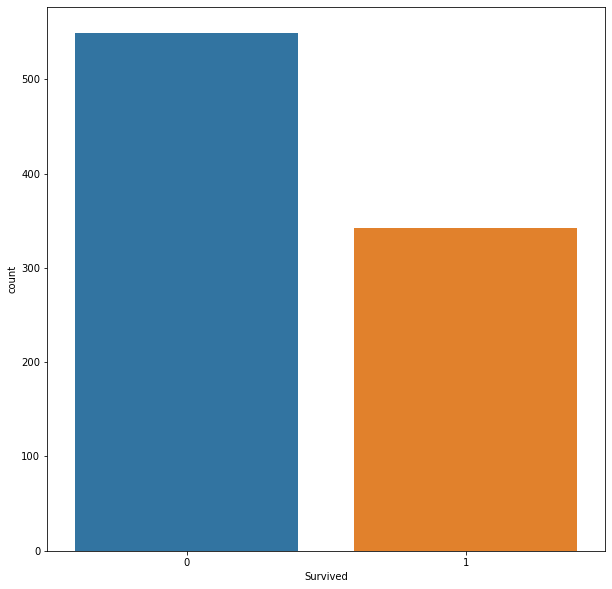

In [9]:
fig = plt.figure(figsize=(10,10))
sns.countplot(train['Survived'], data=train)

- We can see that overall most passengers **didn't Survive**

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


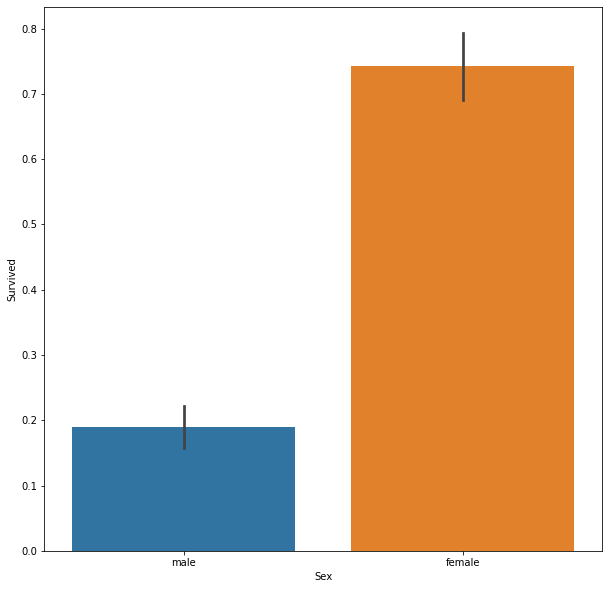

In [10]:
fig = plt.figure(figsize=(10,10))

sns.barplot(x="Sex", y="Survived", data=train)

#print percentages of females vs. males that survive
print("Percentage of females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

- **Females** have a much higher chance of Survival than **Men**

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


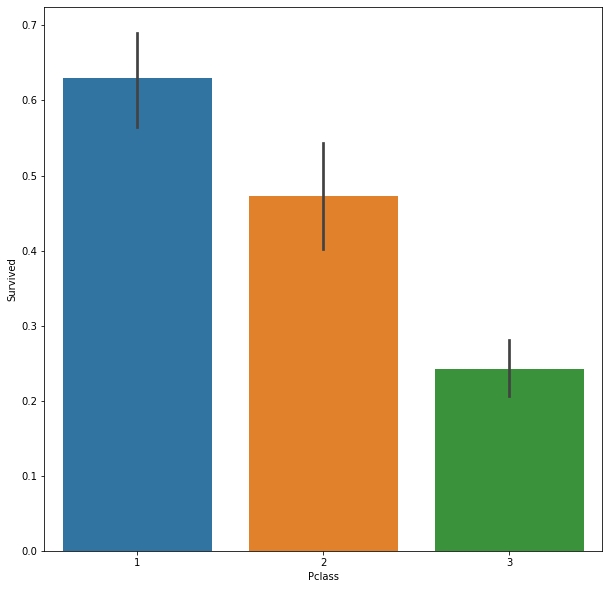

In [11]:
fig = plt.figure(figsize=(10,10))


#draw a bar plot of survival by Pclass
sns.barplot(x="Pclass", y="Survived", data=train)

#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

- People who had a **better class** were **more likely to Survive**

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


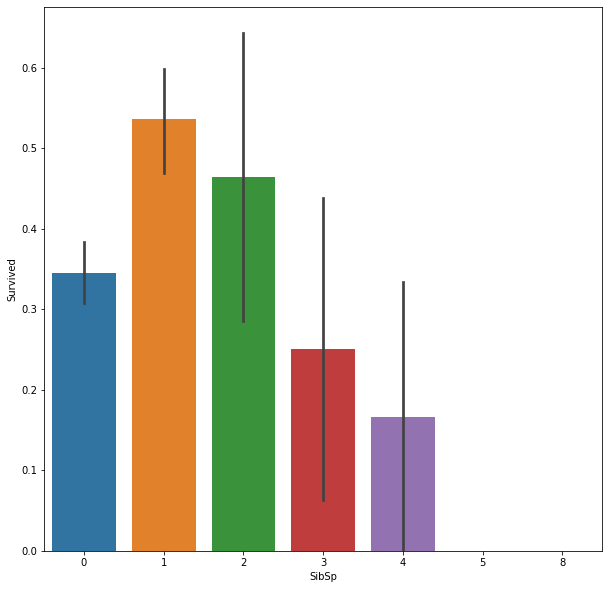

In [12]:
fig = plt.figure(figsize=(10,10))


#draw a bar plot for SibSp vs. survival
sns.barplot(x="SibSp", y="Survived", data=train)

#I won't be printing individual percent values for all of these.
print("Percentage of SibSp = 0 who survived:", train["Survived"][train["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", train["Survived"][train["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", train["Survived"][train["SibSp"] == 2].value_counts(normalize = True)[1]*100)

- There isn't a clear correlation but in general people with more siblings/spouses were less likely survive. Also people with no siblings/spouses were less likely to survive than people with one or two siblings/spouses.

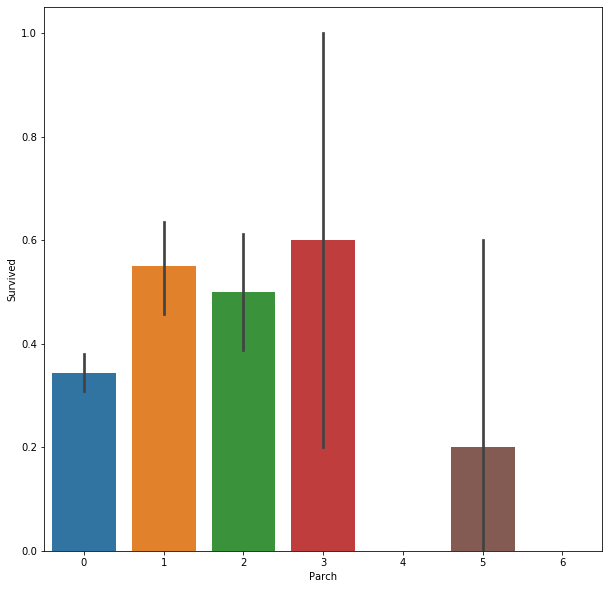

In [13]:
fig = plt.figure(figsize=(10,10))


sns.barplot(x="Parch", y="Survived", data=train)
plt.show()

- Again, no clear correlation but people with no parents were less likely to survive than those with 1-3 parents/children.

<font size="+3" color="blue"><b>4 - Data Preparation</b></font><br><a id="4"></a>

We find correlations between features and impute missing values using the correlations. Using feature engineering we create **new features that are beneficial to our dataset** `FamLabel`, `Deck`, and `Title`.

In [14]:
# Combining Data

dataset = pd.concat([train, test], sort=False, ignore_index=True)

# Visualizing missing values
dataset.isnull().mean().sort_values(ascending=False)

Cabin          0.774637
Survived       0.319328
Age            0.200917
Embarked       0.001528
Fare           0.000764
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
PassengerId    0.000000
dtype: float64

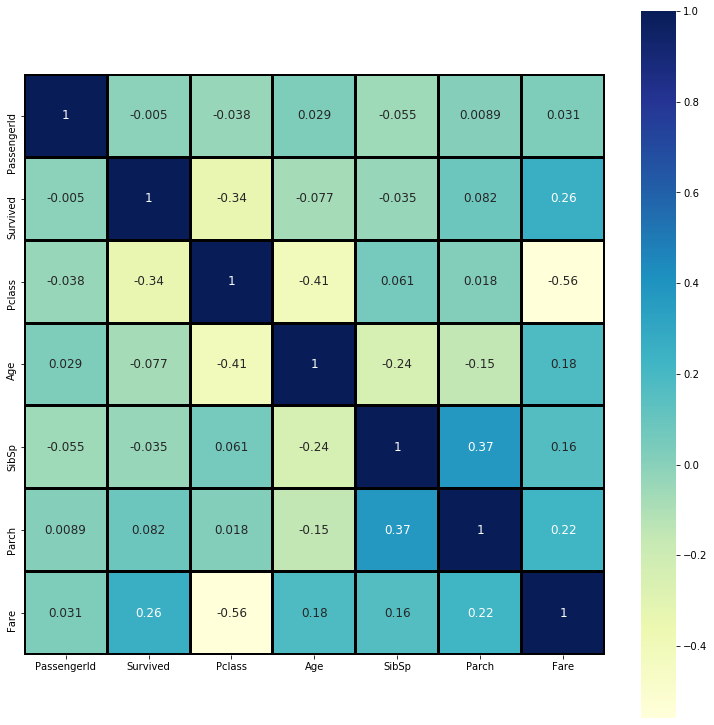

In [15]:
# Checking correlations with Heatmap

fig, axs = plt.subplots(nrows=1, figsize=(13, 13))
sns.heatmap(dataset.corr(), annot=True, square=True, cmap='YlGnBu', linewidths=2, linecolor='black', annot_kws={'size':12})

In [16]:
# Filling in the missing value in `Fare` with its median
dataset['Fare'].fillna(dataset['Fare'].median(), inplace=True)


# Filling in the missing value in 'Embarked' with its mode (Value: 'S')
dataset['Embarked'] = dataset['Embarked'].fillna('S')

- Creating `Title` feature from `Name` feature

In [17]:
# Creating 'Title' column
dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)
dataset['Title'].unique().tolist()

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'Countess',
 'Jonkheer',
 'Dona']

In [18]:
# This shows the percentage of occurrences for each title. 'Mr' occurs the most often.

dataset['Title'].value_counts(normalize=True)*100

Mr          57.830405
Miss        19.862490
Mrs         15.049656
Master       4.660046
Dr           0.611154
Rev          0.611154
Col          0.305577
Major        0.152788
Ms           0.152788
Mlle         0.152788
Jonkheer     0.076394
Mme          0.076394
Don          0.076394
Dona         0.076394
Lady         0.076394
Countess     0.076394
Capt         0.076394
Sir          0.076394
Name: Title, dtype: float64

In [19]:
# Replacing less familiar names with more familiar names
dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer')
dataset['Title'] = dataset['Title'].replace(['Jonkheer', 'Master'], 'Master')
dataset['Title'] = dataset['Title'].replace(['Don', 'Sir', 'the Countess', 'Lady', 'Dona'], 'Royalty')
dataset['Title'] = dataset['Title'].replace(['Mme', 'Ms', 'Mrs'], 'Mrs')
dataset['Title'] = dataset['Title'].replace(['Mlle', 'Miss'], 'Miss')
  

# Imputing missing values with 0
dataset['Title'] = dataset['Title'].fillna(0)

dataset['Title'].value_counts()

Mr          757
Miss        262
Mrs         200
Master       62
Officer      23
Royalty       4
Countess      1
Name: Title, dtype: int64

In [20]:
# Filling the missing values in Age with its median
dataset['Age'].fillna(dataset['Age'].median(), inplace=True)

- Columns `SibSp` and `Parch` are very similar to each other in meaning and in correlation. 

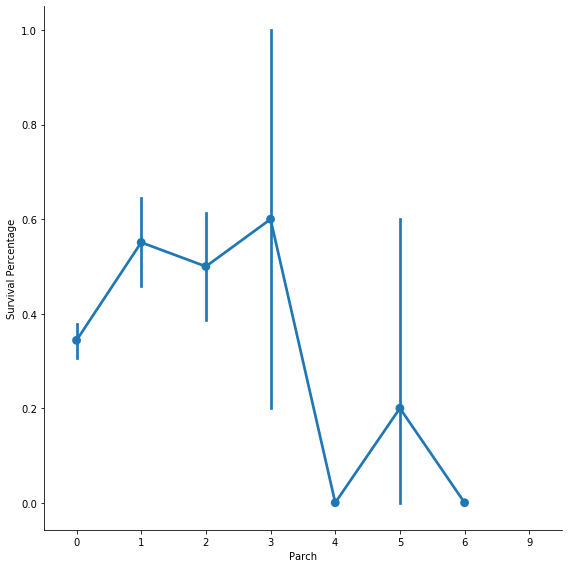

In [21]:
g  = sns.factorplot(x="Parch",y="Survived",data=dataset, size = 8)
g = g.set_ylabels("Survival Percentage")

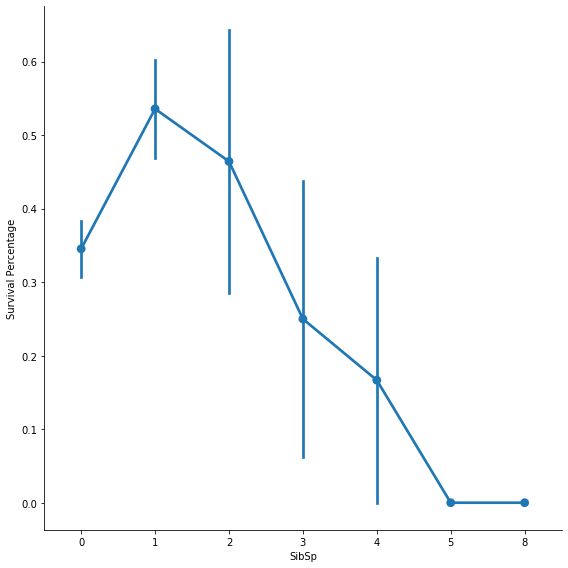

In [22]:
g  = sns.factorplot(x="SibSp",y="Survived",data=dataset, size = 8)
g = g.set_ylabels("Survival Percentage")

- Create a new feature called `FamSize` which combines `Parch` and `SibSp`

In [23]:
# Family Size = # of Siblings + # of Parents + You
dataset['FamSize'] = dataset['SibSp'] + dataset['Parch'] + 1

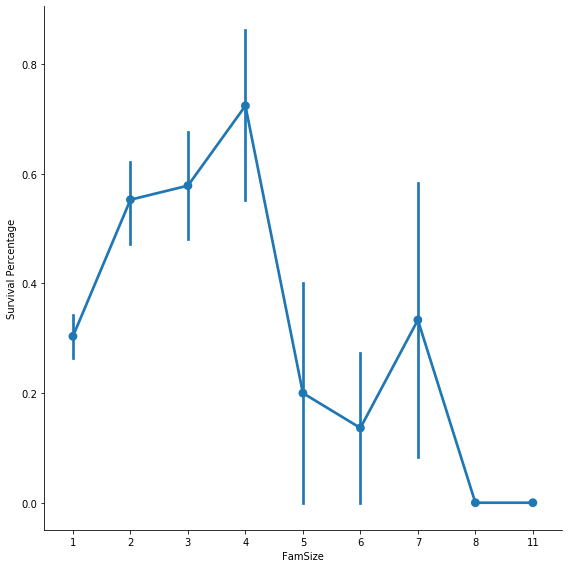

In [24]:
g  = sns.factorplot(x="FamSize",y="Survived",data=dataset, size = 8)
g = g.set_ylabels("Survival Percentage")

- Create a new feature called `FamLabel` which categorizes the family size.

In [25]:
def family_label(s):
    if (s >= 2) & (s <= 4):
        return 2
    elif ((s > 4) & (s <= 7)) | (s == 1):
        return 1
    elif (s > 7):
        return 0
    
dataset['FamLabel']=dataset['FamSize'].apply(family_label)
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamSize,FamLabel
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,1


- Graphing our **new** `FamLabel` feature

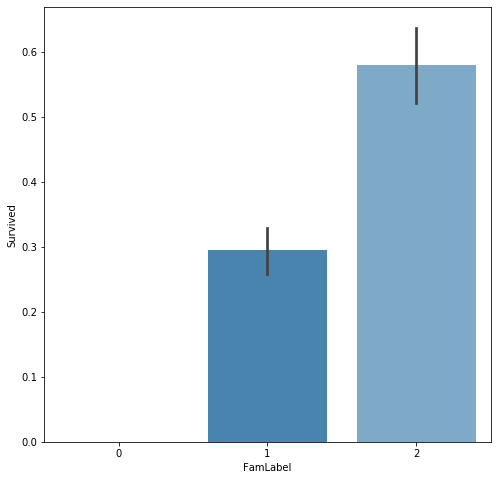

In [26]:
plt.figure(figsize=(8, 8))
sns.barplot(x="FamLabel", y="Survived", data=dataset, palette='Blues_d')
plt.show()

- Although our `Cabin` feature has many missing values. We can still create a new feature called `Deck` which is the first letter of the Cabin name. We do this because the first letter of the cabin name represents the **location of the cabin.**

In [27]:
dataset['Cabin'] = dataset['Cabin'].fillna('Unknown')
dataset['Deck']=dataset['Cabin'].str.get(0)

- Let's visualize our new `Deck` feature

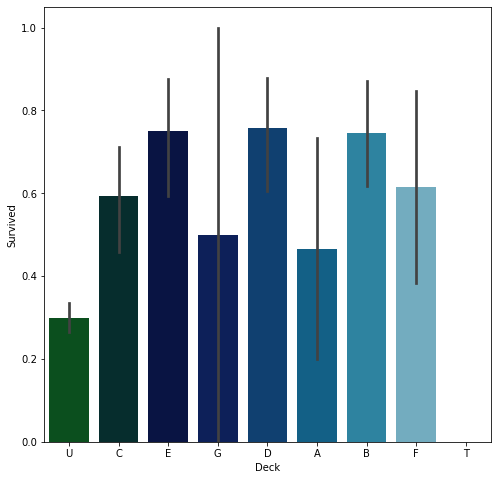

In [28]:
plt.figure(figsize=(8, 8))
sns.barplot(x='Deck', y='Survived', data=dataset, palette='ocean')
plt.show()

- Dropping `Name`, `Ticket`, `SibSp`, `Parch`, `FamSize`, and `Cabin` because they were already used for **feature engineering** or are **useless**

In [29]:
dataset.drop(['Name', 'Ticket', 'SibSp', 'Parch', 'FamSize', 'Cabin'], axis=1, inplace=True)

<font size="+3" color="blue"><b>5 - Modeling</b></font><br><a id="5"></a>

In [30]:
dataset.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Sex             object
Age            float64
Fare           float64
Embarked        object
Title           object
FamLabel         int64
Deck            object
dtype: object

- We still have some **categorical features** which we must change to **numerical** so we use a **Label Encoder**

In [31]:
label = LabelEncoder()

for col in ['Sex', 'Embarked', 'Deck', 'Title']:
    dataset[col] = label.fit_transform(dataset[col])

- Split dataset back into train and test variables.

In [32]:
# Splitting dataset into train
train = dataset[:len(train)]

# Splitting dataset into test
test = dataset[len(train):]

# Drop labels 'Survived' because there shouldn't be a Survived column in the test data
test.drop(labels=['Survived'], axis=1, inplace=True)

In [33]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamLabel,Deck
0,1,0.0,3,1,22.0,7.2500,2,3,2,8
1,2,1.0,1,0,38.0,71.2833,0,4,2,2
2,3,1.0,3,0,26.0,7.9250,2,2,1,8
3,4,1.0,1,0,35.0,53.1000,2,4,2,2
4,5,0.0,3,1,35.0,8.0500,2,3,1,8


In [34]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,FamLabel,Deck
891,892,3,1,34.5,7.8292,1,3,1,8
892,893,3,0,47.0,7.0000,2,4,2,8
893,894,2,1,62.0,9.6875,1,3,1,8
894,895,3,1,27.0,8.6625,2,3,1,8
895,896,3,0,22.0,12.2875,2,4,2,8


- Change `Survived` to an **integer**

In [35]:
train['Survived'] = train['Survived'].astype(int)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

# Setting up variables for modelling
y = train.Survived

X = train.drop('Survived', axis=1)


- Testing a bunch of models to see which scores the **best**

In [37]:
# Logistic Regression
print("Logistic Regression:", cross_val_score(LogisticRegression(), X, y).mean())

# SVC
print("SVC:", cross_val_score(SVC(), X, y).mean())

# Random Forest
print("Random Forest:", cross_val_score(RandomForestClassifier(), X, y).mean())

# GaussianNB
print("GaussianNB:", cross_val_score(GaussianNB(), X, y).mean())

# Decision Tree
print("Decision Tree:", cross_val_score(DecisionTreeClassifier(), X, y).mean())

Logistic Regression: 0.7688406251961585
SVC: 0.6375117695059946
Random Forest: 0.8114933149205952
GaussianNB: 0.7711192015567133
Decision Tree: 0.7656455966354907


- We clearly saw **Random Forest** perform the best. Let's use a pre-built model for **cross-validation**

In [38]:
select = SelectKBest(k = 'all')
final_model = RandomForestClassifier(random_state = 10, warm_start = True, 
                                  n_estimators = 26,
                                  max_depth = 6, 
                                  max_features = 'sqrt')

pipeline = make_pipeline(select, final_model)

cv_result = cross_validate(pipeline, X, y, cv= 10)

print("CV Test Score : Mean - %.7g | Std - %.7g " % (np.mean(cv_result['test_score']), \
                                                     np.std(cv_result['test_score'])))

CV Test Score : Mean - 0.8417353 | Std - 0.04007891 


Our **cross-validation score** is **0.8417353.** Now let's use this model to make **predictions** and a **submission.**

In [39]:
pipeline.fit(X, y)

final_predictions = pipeline.predict(test)

<font size="+3" color="blue"><b>6 - Submission</b></font><br><a id="6"></a>

- **Submission to the contest**

In [40]:
output = pd.DataFrame({'PassengerId': Id, 'Survived': final_predictions})
output.to_csv('submission.csv', index=False)

In [41]:
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
